## **Sum Frequency of a RAAD Form per Year in Site Date Range**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import figure
import numpy as np
import regex as re
sns.set()
import pathlib
from pathlib import Path

import sys
sys.path.append("../src")
from functions import*

In [2]:
data = pd.read_csv('RAAD_data_restructured.csv')
data['origin_h2'] = data['origin_h2'].fillna('')

In [12]:
df0 = data.groupby(['origin_h1', 'site_name_modern', 'RAAD_form', 'site_start_date', 'site_end_date'])['frequency'].sum()
df0 = df0.reset_index()
df0 = df0.rename(columns = {'frequency':'summed_freq'})
df0.head()

,origin_h1,site_name_modern,RAAD_form,site_start_date,site_end_date,summed_freq
0,em,aislingen,camulodunum 184rhodian,15,70,1
1,em,alphen aan den rijn,camulodunum 184rhodian,43,240,4
2,em,alphen aan den rijn,haltern 67cam 184,43,240,1
3,em,alzey,dressel 24,1,400,2
4,em,anreppen,camulodunum 184rhodian,4,9,22


In [13]:
df1 = sum_freq_per_year(df0,
                        sum_freq = 'summed_freq',
                        lower_date = 'site_start_date',
                        upper_date = 'site_end_date')

df1.head()

,origin_h1,site_name_modern,RAAD_form,site_start_date,site_end_date,summed_freq,Sum_freq_per_year
0,em,aislingen,camulodunum 184rhodian,15,70,1,0.018182
1,em,alphen aan den rijn,camulodunum 184rhodian,43,240,4,0.020305
2,em,alphen aan den rijn,haltern 67cam 184,43,240,1,0.005076
3,em,alzey,dressel 24,1,400,2,0.005013
4,em,anreppen,camulodunum 184rhodian,4,9,22,4.400000


In [15]:
gaul = year_freq_df(df1[df1['origin_h1'] == 'gaul'], 
                    lower_date = 'site_start_date',
                    upper_date = 'site_end_date',
                    sum_freq = 'Sum_freq_per_year')
gaul.head(50)

Year
-100    0.175000
-99     0.175000
-98     0.175000
-97     0.175000
-96     0.175000
-95     0.175000
-94     0.175000
-93     0.175000
-92     0.175000
-91     0.175000
-90     0.175000
-89     0.175000
-88     0.175000
-87     0.175000
-86     0.175000
-85     0.175000
-84     0.175000
-83     0.175000
-82     0.175000
-81     0.175000
-80     0.183333
-79     0.183333
-78     0.183333
-77     0.183333
-76     0.183333
-75     0.183333
-74     0.183333
-73     0.183333
-72     0.183333
-71     0.183333
-70     0.183333
-69     0.183333
-68     0.183333
-67     0.183333
-66     0.183333
-65     0.183333
-64     0.183333
-63     0.183333
-62     0.183333
-61     0.183333
-60     0.183333
-59     0.183333
-58     0.183333
-57     0.183333
-56     0.183333
-55     0.183333
-54     0.183333
-53     0.183333
-52     0.183333
-51     0.183333
Name: Frequency, dtype: float64

In [16]:
em = year_freq_df(df1[df1['origin_h1'] == 'em'], 
                  lower_date = 'site_start_date',
                  upper_date = 'site_end_date',
                  sum_freq = 'Sum_freq_per_year')
em.head(50)

Year
-100    0.095000
-99     0.095000
-98     0.095000
-97     0.095000
-96     0.095000
-95     0.095000
-94     0.095000
-93     0.095000
-92     0.095000
-91     0.095000
-90     0.095000
-89     0.095000
-88     0.095000
-87     0.095000
-86     0.095000
-85     0.095000
-84     0.095000
-83     0.095000
-82     0.095000
-81     0.095000
-80     0.103333
-79     0.103333
-78     0.103333
-77     0.103333
-76     0.103333
-75     0.103333
-74     0.103333
-73     0.103333
-72     0.103333
-71     0.103333
-70     0.103333
-69     0.103333
-68     0.103333
-67     0.103333
-66     0.103333
-65     0.103333
-64     0.103333
-63     0.103333
-62     0.103333
-61     0.103333
-60     0.103333
-59     0.103333
-58     0.103333
-57     0.103333
-56     0.103333
-55     0.103333
-54     0.103333
-53     0.103333
-52     0.103333
-51     0.103333
Name: Frequency, dtype: float64

In [17]:
df_dictionary = {'EM': em, 'Gaul': gaul}

/home/kate/Documents/work/minerva/sonata/Sonata-Code/RAAD_data/../functions.py:478: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


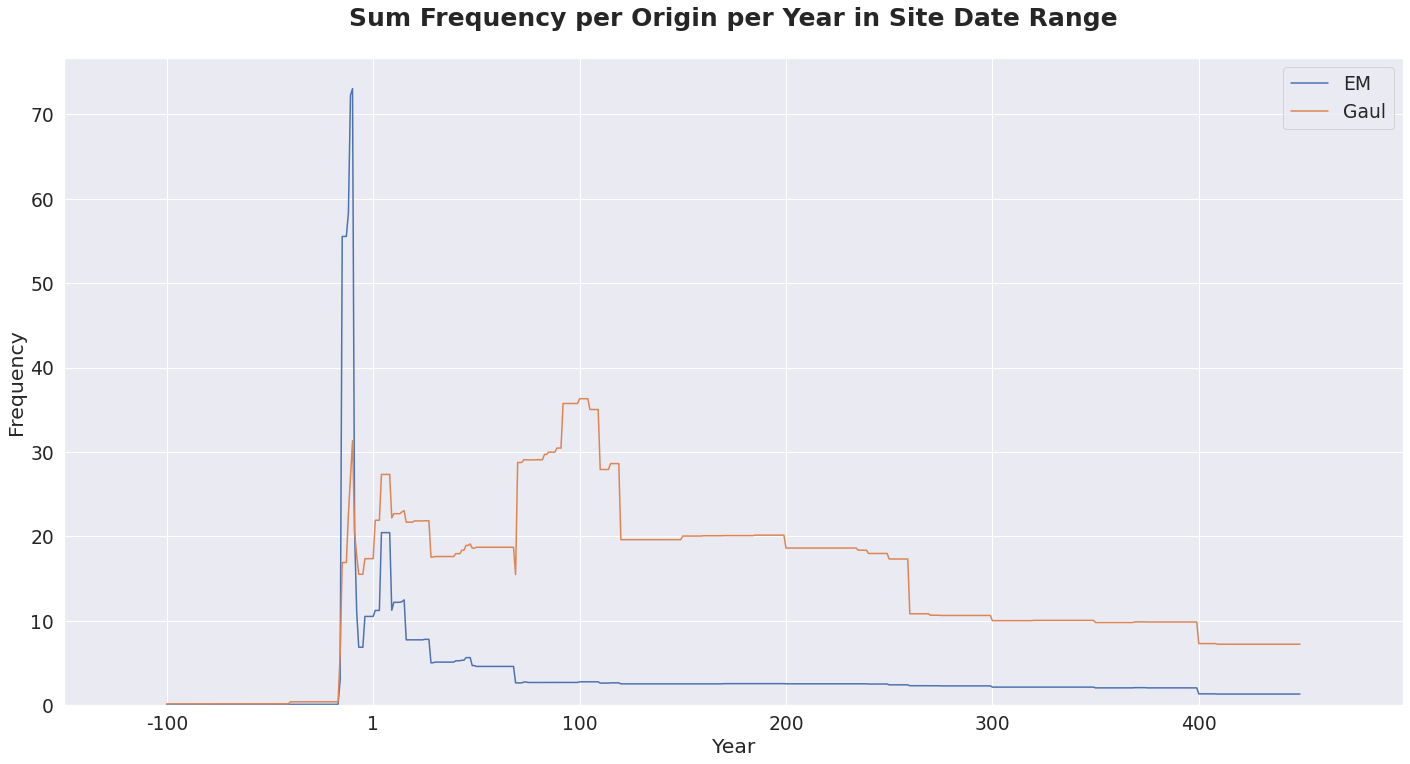

In [18]:
plot_graph(dicts_of_df = df_dictionary,
           ylabel = 'Frequency', 
           xlabel = 'Year',
           title = 'Sum Frequency per Origin per Year in Site Date Range', 
           filename = 'Frequency_per_year.pdf',
           save_path = './')